<a href="https://colab.research.google.com/github/norhaneng/TASK5_Prodigy_Infotech.ipynb/blob/main/TASK5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

# Load the dataset
df = pd.read_csv('/content/accident_data.csv')

In [3]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,...,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Br...,...,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.4,Stationary traffic on CA-17 from Summit Rd (CA...,...,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.0,Accident on US-395 Southbound at Topsy Ln.,...,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.0,Accident on I-595 Westbound at Exit 4 / Pine I...,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [16]:
# Convert 'Start_Time' and 'End_Time' to datetime format
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')

# Calculate accident duration in minutes
df['Duration'] = (df['End_Time'] - df['Start_Time']).dt.total_seconds() / 60

# Handle missing values by filling with mean values
df['Temperature(F)'].fillna(df['Temperature(F)'].mean(), inplace=True)
df['Visibility(mi)'].fillna(df['Visibility(mi)'].mean(), inplace=True)

# Drop rows where critical data might be missing, such as Location or Severity
df.dropna(subset=['Start_Lat', 'Start_Lng', 'Severity'], inplace=True)

# Extract hour, day of week, and month for time-based analysis
df['Hour'] = df['Start_Time'].dt.hour
df['DayOfWeek'] = df['Start_Time'].dt.dayofweek
df['Month'] = df['Start_Time'].dt.month_name()


<ipython-input-16-006295916511>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Temperature(F)'].fillna(df['Temperature(F)'].mean(), inplace=True)
<ipython-input-16-006295916511>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

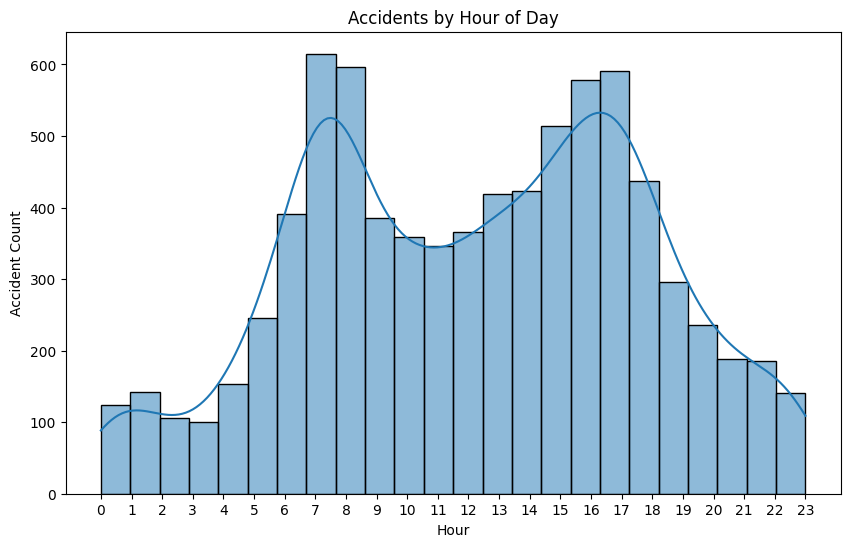

In [18]:
# Plot accident frequency by hour of day
plt.figure(figsize=(10, 6))
sns.histplot(df['Hour'], bins=24, kde=True)
plt.title("Accidents by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Accident Count")
plt.xticks(range(0, 24))
plt.show()

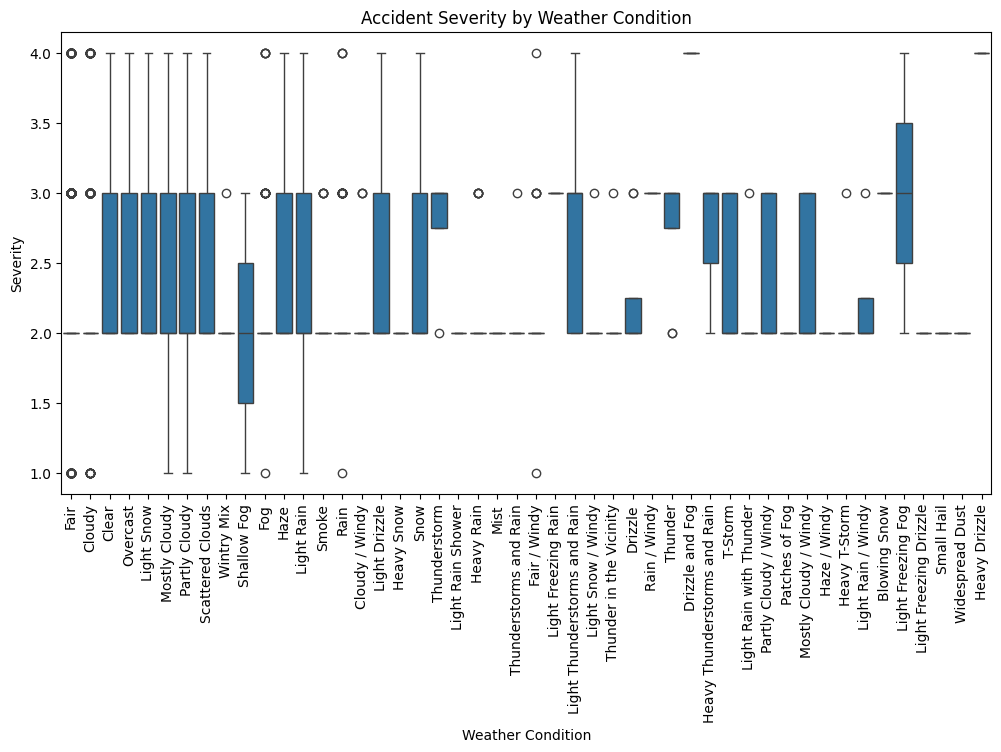

In [8]:
# Boxplot for accident severity by weather condition
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Weather_Condition', y='Severity')
plt.xticks(rotation=90)
plt.title("Accident Severity by Weather Condition")
plt.xlabel("Weather Condition")
plt.ylabel("Severity")
plt.show()

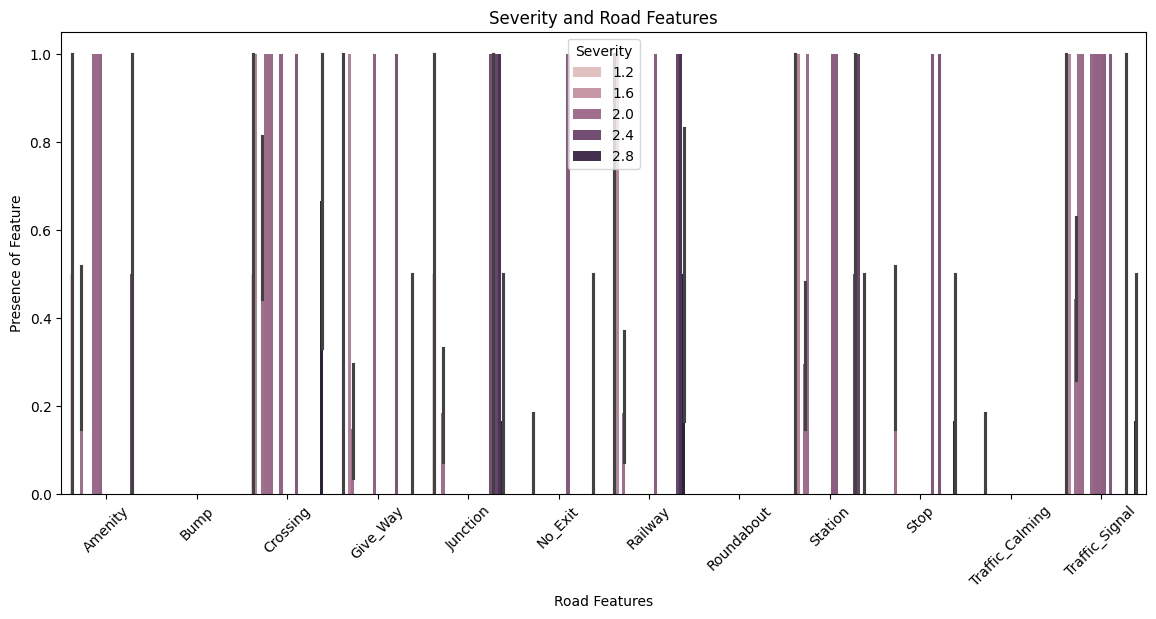

In [21]:
# Analysis of Road Features
road_features = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
                 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal']

plt.figure(figsize=(14, 6))
severity_by_feature = df.groupby(road_features).Severity.mean().reset_index().melt(id_vars="Severity")
sns.barplot(x="variable", y="value", hue="Severity", data=severity_by_feature)
plt.title("Severity and Road Features")
plt.xticks(rotation=45)
plt.ylabel("Presence of Feature")
plt.xlabel("Road Features")
plt.show()

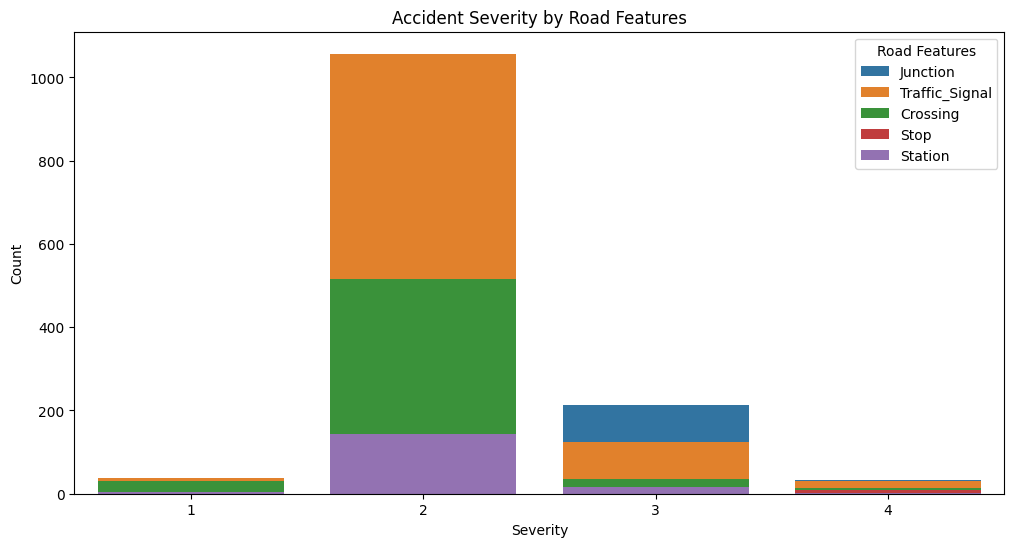

In [9]:
# Plot accident severity across different road features
road_features = ['Junction', 'Traffic_Signal', 'Crossing', 'Stop', 'Station']
plt.figure(figsize=(12, 6))

for feature in road_features:
    sns.countplot(data=df[df[feature] == True], x='Severity', label=feature)

plt.title("Accident Severity by Road Features")
plt.xlabel("Severity")
plt.ylabel("Count")
plt.legend(title='Road Features')
plt.show()

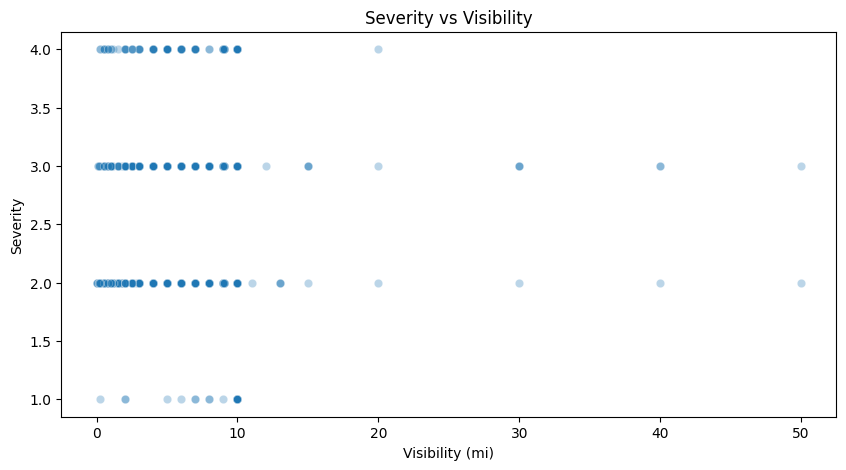

In [20]:
# Relationship between Visibility and Severity
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Visibility(mi)', y='Severity', alpha=0.3)
plt.title("Severity vs Visibility")
plt.xlabel("Visibility (mi)")
plt.ylabel("Severity")
plt.show()

In [11]:
# Initialize map centered around the mean latitude and longitude of the dataset
map_accidents = folium.Map(location=[df['Start_Lat'].mean(), df['Start_Lng'].mean()], zoom_start=10)

# Prepare data for heatmap
heat_data = [[row['Start_Lat'], row['Start_Lng']] for index, row in df.iterrows()]

# Add heatmap to the map
HeatMap(heat_data).add_to(map_accidents)

# Save the map to an HTML file
map_accidents.save("accident_hotspots.html")


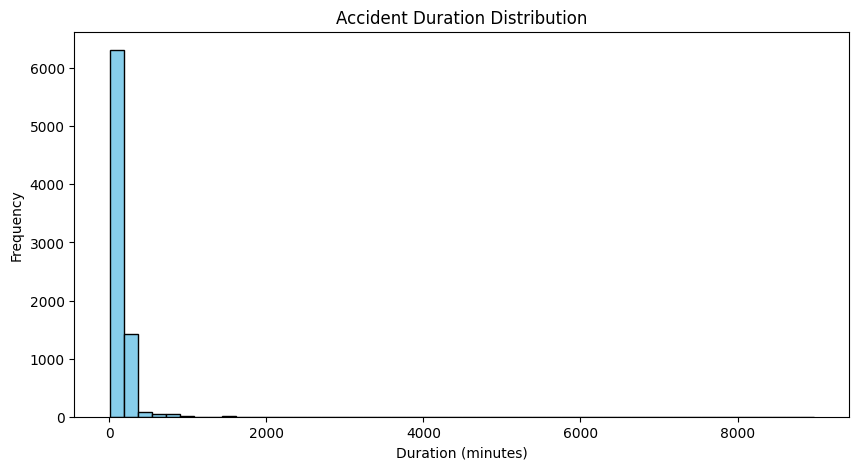

<ipython-input-23-17ea6d2147a0>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='Start_Lng', y='Start_Lat', shade=True, cmap="Reds", bw_adjust=0.5)


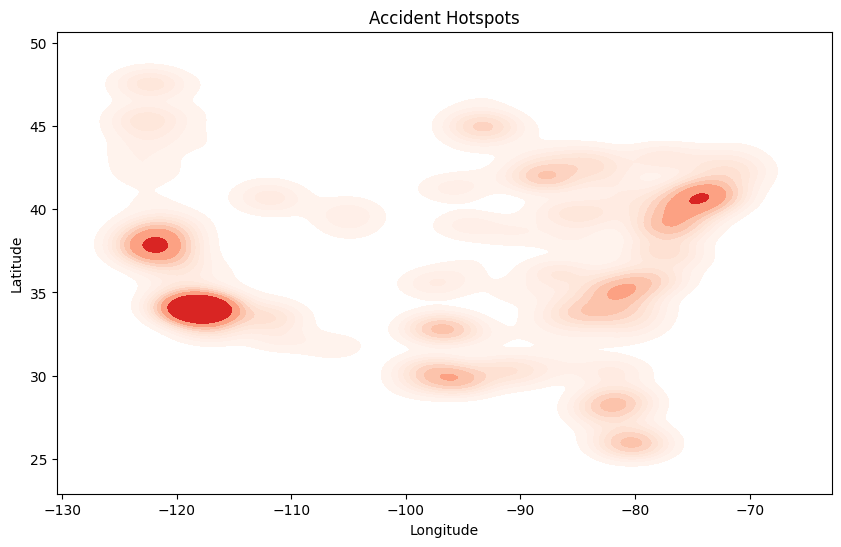

In [23]:
# 5. Accident Duration Distribution (Histogram)
plt.figure(figsize=(10, 5))
plt.hist(df['Duration'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title('Accident Duration Distribution')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

# 6. KDE plot for accident hotspots (latitude and longitude)
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Start_Lng', y='Start_Lat', shade=True, cmap="Reds", bw_adjust=0.5)
plt.title('Accident Hotspots')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
